# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

## Macro Data

Macro data gives the big picture of how a country's economy is performing. In this notebook, you will download the following data:

1. [US Gross Domestic Product](#gdp)
2. [Gross Domestic Product of Different Countries](#top-10)
3. [Consumer Price Index](#cpi)
4. [US Treasury Rate](#treasury-3m)
5. [Unemployment Rate](#unemployment-rate)
6. [US Brent Crude](#crude)
7. [Gold ETF](#gold)

Note: At times, downloading the data may give you errors due to changes in yahoo finance. 

In such cases, it is recommende to upgraded the `yfinance` package using `pip install --upgrade yfinance`. You can update the 'cell type' for the below from 'Raw NBConvert' to a 'Code' cell. Then restart the kernel and run all of the following cells again.

## Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from yahoofinancials import YahooFinancials
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn-darkgrid')
import os
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings('ignore')

# Import the get_fred_api from the FMDA_quantra module
# The code of this module can be found in the downloads (last section) of this course
# You need to edit FMDA_quantra.py file and add your FRED API key manually before you continue
#from data_modules.FMDA_quantra import get_fred_api

# Dataframe to store the values as of today
macro_data = pd.DataFrame(index=['Value as of '+str(date.today())])

<a id='gdp'></a> 
## US Gross Domestic Product

Gross Domestic Product (or GDP) is the monetary value of how much a country has produced in a year. It has a very significant impact on the financial market. The Federal Reserve Bank of St. Louis maintains an economic database, Federal Reserve Economic Data (FRED). You can use the Python wrapper of FRED API `fredapi` to get this data.

You need to generate your API key by logging in [here](https://research.stlouisfed.org/useraccount/). Follow the steps [here](https://research.stlouisfed.org/docs/api/api_key.html) to generate your API key.

In order to use this library, you need to import it and pass your API key as below:
```python
from fredapi import Fred
fred = Fred(api_key='YOUR_FRED_API_KEY')
```

You can now use the `get_series` method of the `Fred` package to download the GDP time series.

Syntax:
```python
fred.get_series(series_ID)
```

Parameters:
**series_ID:** Code of the time series you want to download (You can search the ID [here](https://fred.stlouisfed.org/categories))

Returns: A `pandas` series of the required time-series data

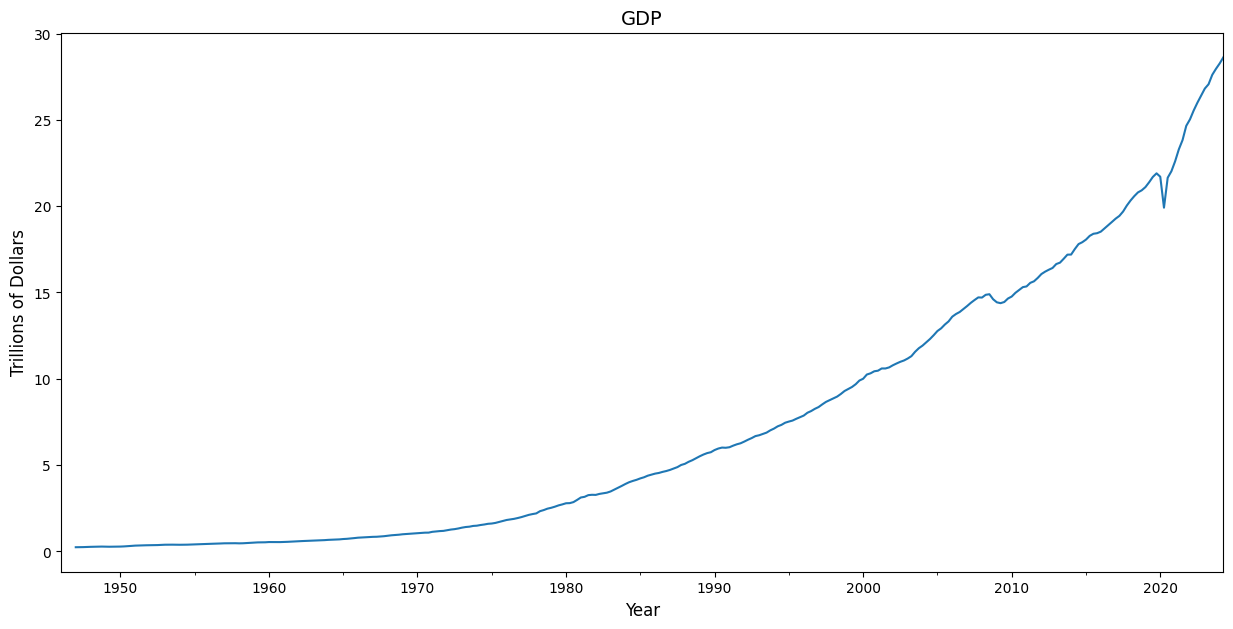

In [8]:
#!pip install fredapi
from fredapi import Fred
fred = Fred(api_key="replace key")

# Get the US GDP
# Series ID for US GDP: GDP
gdp = fred.get_series('GDP')
# Data is fetched in Billions USD, divide by 1000 to convert into Trillions
gdp = gdp/1000
# Store the last value in 'macro_data'
macro_data['US GDP'] = "{} trillions USD".format(gdp[-1])

# Plot the GDP
plt.figure(figsize=(15,7))
gdp.plot()
# Set the title and axis label
plt.title('GDP', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trillions of Dollars', fontsize=12)
# Show the plot
plt.show()

<a id='top-10'></a> 
## Gross Domestic Product of Different Countries

You can download the GDP of different countries from the World Bank's database. Python comes with a powerful package `wbgapi` that provides access to the World Bank's database. GDP per capita data can be accessed by using the appropriate code.

Syntax:
```python
import wbgapi as wb
wb.data.DataFrame([code], mrv, labels=True)
```

Parameters:
1. **code:** Series code, `NY.GDP.MKTP.CD` for GDP (current USD)
2. **mrv:** Most recent values
3. **labels:** Adds the country name to the dataframe when `True`

Returns: A `pandas` dataframe with country name and respective GDPs

You can find the complete list of code for different series by running the below code:

```python
wb.series.info()
```

After you get the dataframe, apply the below operations on the resulting dataframe to get the list of countries with GDP in descending order:
1. Drop the missing values from the dataframe using the `dropna()` method.
2. Sort the values by `NY.GDP.MKTP.CD` column in descending order by using the `sort_values()` method.

In [2]:
#!pip install wbgapi
import wbgapi as wb
ny_gdp = wb.data.DataFrame(['ny.gdp.mktp.cd'], 
                           mrv=1, 
                           labels=True).dropna().sort_values(by='NY.GDP.MKTP.CD',
                                                             ascending=False)[:10]

ny_gdp

,Country,NY.GDP.MKTP.CD
economy,,
WLD,World,1.054350e+14
HIC,High income,6.765374e+13
OED,OECD members,6.409887e+13
PST,Post-demographic dividend,5.985180e+13
IBT,IDA & IBRD total,4.155972e+13
IBD,IBRD only,3.873304e+13
LMY,Low & middle income,3.742521e+13
MIC,Middle income,3.678694e+13
EAS,East Asia & Pacific,3.077566e+13


You can filter the dataframe by the country code to check the GDP of a particular country. Let's plot the values for a few countries.

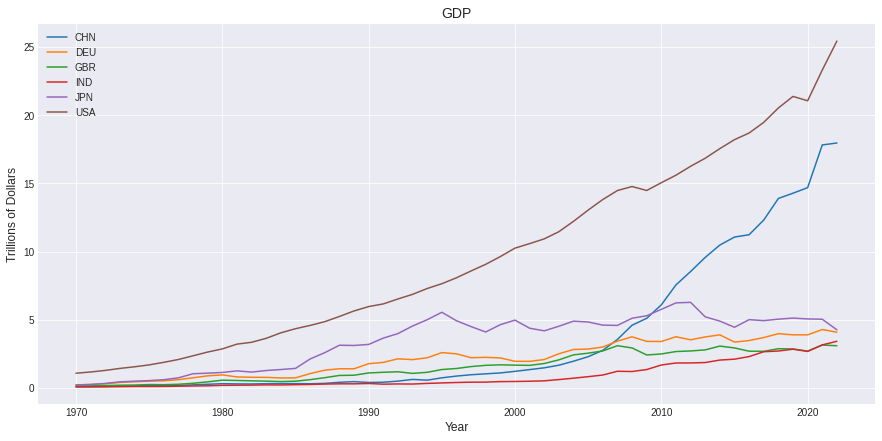

In [4]:
# GDP of 6 countries in Trillions USD
GDP = wb.data.DataFrame(['ny.gdp.mktp.cd'], 
                        ['USA','CHN','JPN','DEU','IND','GBR']).T.dropna()/(10**12)

# Convert GDP data to numpy arrays
GDP_values = GDP.values
xtick = np.array([int(x[-4:]) for x in GDP.index.tolist()])

# Plot the GDP
fig, ax = plt.subplots(figsize=(15,7))

# Plot the series 
for country_index in range(GDP_values.shape[1]):
    ax.plot(xtick, GDP_values[:, country_index], label=GDP.columns[country_index])

# Set the title and axis label
plt.title('GDP', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trillions of Dollars', fontsize=12)
plt.legend()

# Show the plot
plt.show()


<a id='cpi'></a> 
## Consumer Price Index

You can now use the `get_series` method of the `Fred` package to download the data by passing the appropriate series ID. The ID for CPI is `CPIAUCSL`. Plot the percentage change from the previous year to visualise the index.

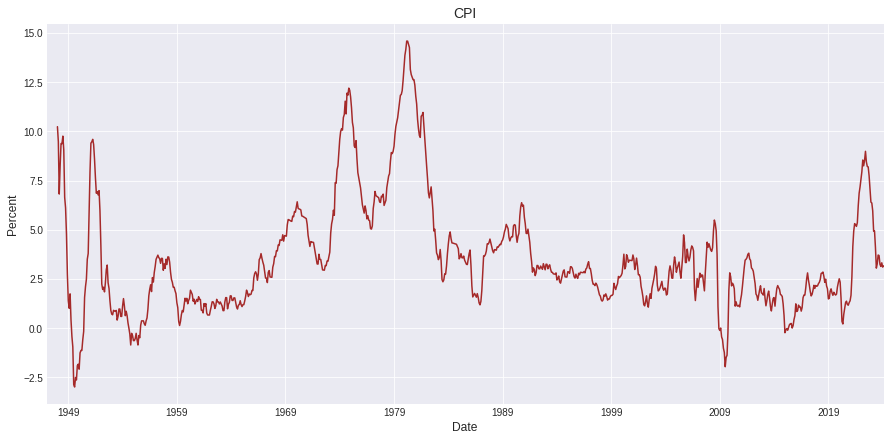

In [5]:
# Get the CPI
# Series ID for CPI: CPIAUCSL
cpi = fred.get_series('CPIAUCSL')
# Store the last value in 'macro_data'
macro_data['CPI'] = "{}%".format(round(cpi.pct_change(periods=12)[-1],4)*100)

# Plot the CPI
plt.figure(figsize=(15,7))
(cpi.pct_change(periods=12)*100).plot(color="brown")
# Set the title and axis label
plt.title('CPI', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percent', fontsize=12)
# Show the plot
plt.show()

<a id='treasury-3m'></a> 
## US Treasury

Change the series ID in `get_series` method of the `Fred` package appropriately to download the interest rate.

The IDs are as below:


*   3 Month US Treasury: `DGS3MO`
*   1 Year US Treasury: `DGS1`
*   10 Year US Treasury: `DGS10`


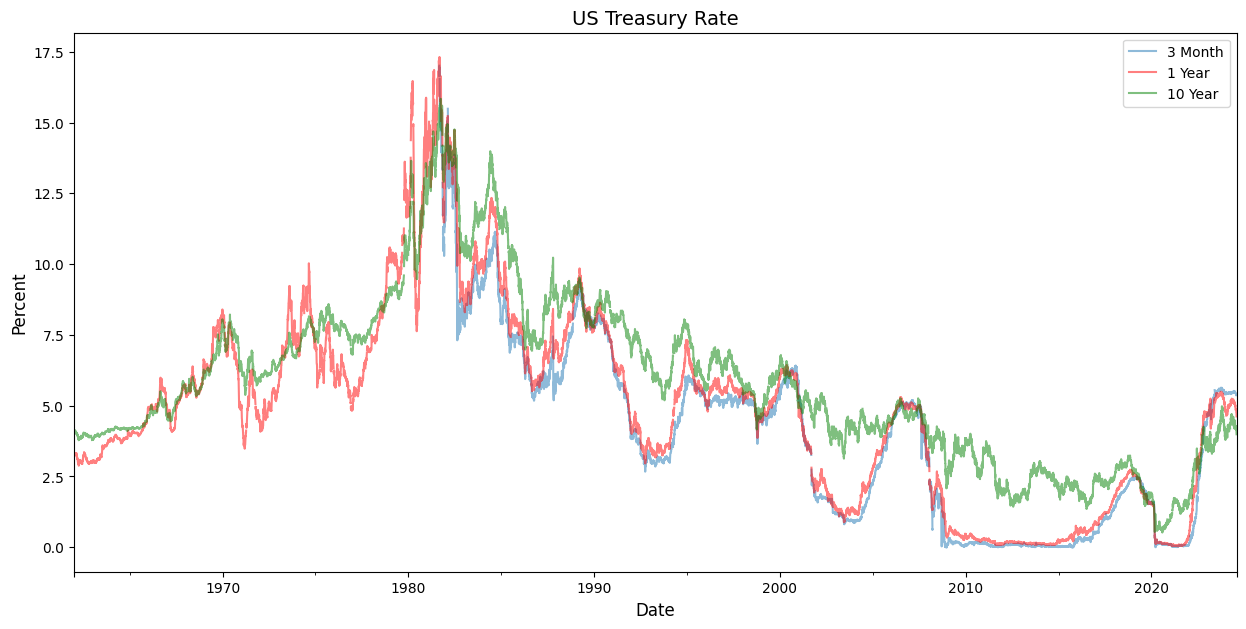

In [12]:
# Get the 3 month, 1 year and 10 year treasury rates
# Series ID for Treasury Rates: DGS3MO, DGS1, DGS10
treasury_3M = fred.get_series('DGS3MO')
treasury_1Y = fred.get_series('DGS1')
treasury_10Y = fred.get_series('DGS10')
# Store the last value in 'macro_data'
macro_data['3 Month US Treasury'] = "{}%".format(treasury_3M[-1])
macro_data['1 Year US Treasury'] = "{}%".format(treasury_1Y[-1])
macro_data['10 Year US Treasury'] = "{}%".format(treasury_10Y[-1])

# Plot the Treasury rates
plt.figure(figsize=(15,7))
treasury_3M.plot(label="3 Month", alpha=.5)
treasury_1Y.plot(label="1 Year", color="red", alpha=.5)
treasury_10Y.plot(label="10 Year", color="green", alpha=.5)
# Set the title and axis label
plt.title('US Treasury Rate', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.legend()
# Show the plot
plt.show()

<a id='unemployment-rate'></a> 
## Unemployment Rate

Change the series ID in `get_series` method of the `Fred` package to `UNRATE` to download the unemployment rate.

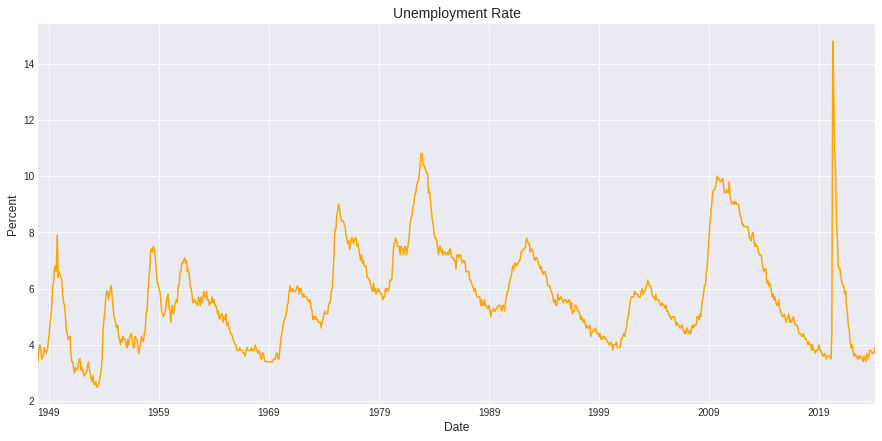

In [7]:
# Get the Unemployment Rate
# Series ID for Unemployment Rate: UNRATE
unemployment_rate = fred.get_series('UNRATE')
# Store the last value in 'macro_data'
macro_data['Unemployment Rate'] = "{}%".format(unemployment_rate[-1])

# Plot the unemployment rate
plt.figure(figsize=(15,7))
unemployment_rate.plot(color="orange")
# Set the title and axis label
plt.title('Unemployment Rate', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percent', fontsize=12)
# Show the plot
plt.show()

<a id='crude'></a> 
## US Brent Crude Price

Change the series ID in `get_series` method of the `Fred` package to `POILBREUSDM` to download the US Brent Crude price.

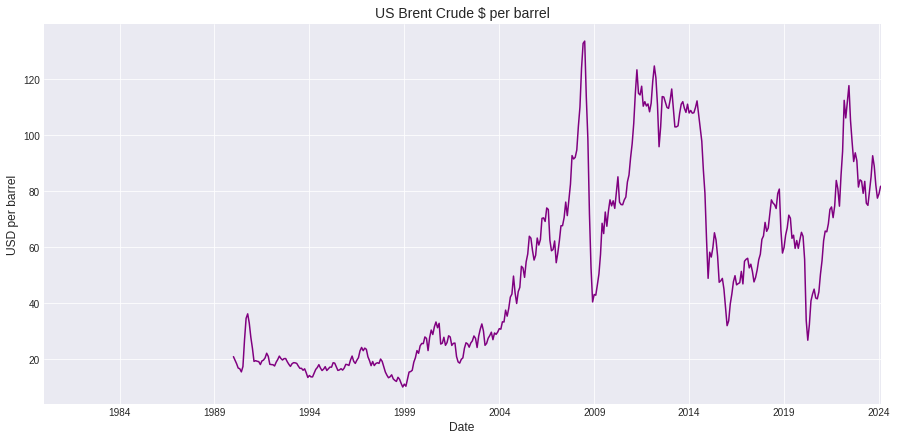

In [8]:
# Get the US Brent Crude price
# Series ID for US Brent Crude price: POILBREUSDM
us_brent_crude = fred.get_series('POILBREUSDM')
# Store the last value in 'macro_data'
macro_data['US Brent Crude'] = "{} USD per barrel".format(us_brent_crude[-1])

# Plot the Crude price
plt.figure(figsize=(15,7))
us_brent_crude.plot(color="purple")
# Set the title and axis label
plt.title('US Brent Crude $ per barrel', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USD per barrel', fontsize=12)
# Show the plot
plt.show()

<a id='gold'></a> 
## Gold ETF

Gold prices are also looked at by investors and traders and they usually invest in Gold ETFs (exchange-traded funds). SPDR Gold Shares ETF (GLD) is one such Gold ETF managed by State Street Global Advisors.

You can use the `download` method of the `yfinance` package to download the Gold price by passing `GLD` as the ticker.

[*********************100%%**********************]  1 of 1 completed


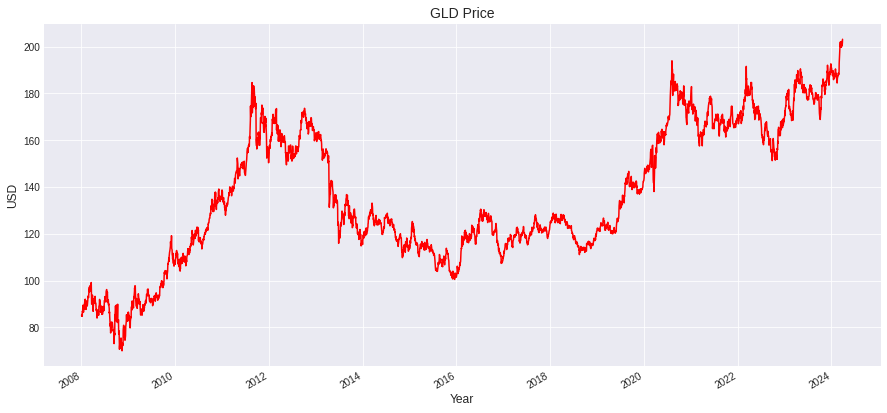

In [9]:
# Get the Gold price
gold_price = yf.download('GLD', '2008-01-01')['Close']
# Store the last value in 'macro_data'
macro_data['GLD Price'] = "{} USD".format(round(gold_price[-1],2))

# Plot the Gold price
plt.figure(figsize=(15,7))
gold_price.plot(color="red")
# Set the title and axis label
plt.title('GLD Price', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)
# Show the plot
plt.show()

## Conclusion

You have visualised the various macro data for various time spans. The most recent value is stored in the dataframe `macro_data`. Let's print the data frame and check the recent values.

In [3]:
# Display the 'macro_data'
macro_data.astype(object).T

,Value as of 2024-08-07


## Tweak the code

Download different macro data of your choice by using the appropriate series code/ticker.
<br><br>